In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [3]:
train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'

In [4]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [7]:
 # useful for getting number of classes
folders = glob('Datasets/Train/*')
  

In [8]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [9]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 264 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 108 images belonging to 4 classes.


In [15]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\kumar\AppData\Local\Temp\ipykernel_15744\675562961.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
9/9 [==============================] - 74s 8s/step - loss: 0.7726 - accuracy: 0.7008 - val_loss: 0.0632 - val_accuracy: 0.9907
Epoch 2/5
9/9 [==============================] - 63s 8s/step - loss: 0.0135 - accuracy: 1.0000 - val_loss: 0.0733 - val_accuracy: 0.9630
Epoch 3/5
9/9 [==============================] - 67s 7s/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.2019 - val_accuracy: 0.8981
Epoch 4/5
9/9 [==============================] - 64s 7s/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.1892 - val_accuracy: 0.8981
Epoch 5/5
9/9 [==============================] - 63s 8s/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1199 - val_accuracy: 0.9444


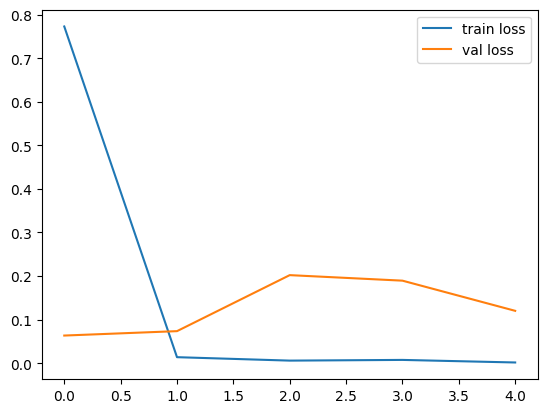

<Figure size 640x480 with 0 Axes>

In [16]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

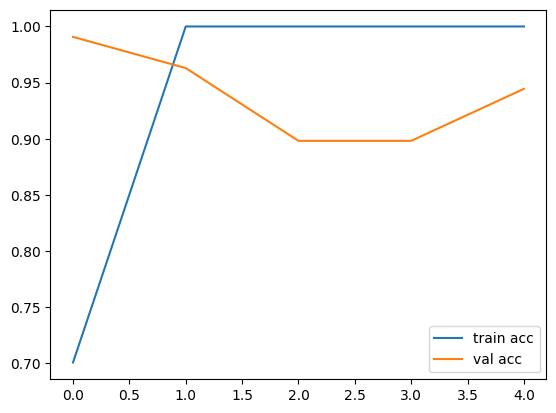

<Figure size 640x480 with 0 Axes>

In [19]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_new_model.h5')